# Notebook de modèles neuronaux pour MNIST

**Librairies**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.preprocessing import image
import time

**Versions de librairies**

In [6]:
import sys
print(f"Python {sys.version}")
print(f"Keras Version: {keras.__version__}")
print(f"TensorFlow Version: {tf.__version__}")
# Verifier la présence de GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Keras Version: 2.10.0
TensorFlow Version: 2.10.1
Num GPUs Available:  0


## Modèles MLP

Données MNIST

In [3]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train type:", type(x_train))
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

x_train type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)

x_test shape: (10000, 28, 28)

y_train shape: (60000,)

y_test shape: (10000,)

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Affichage des images

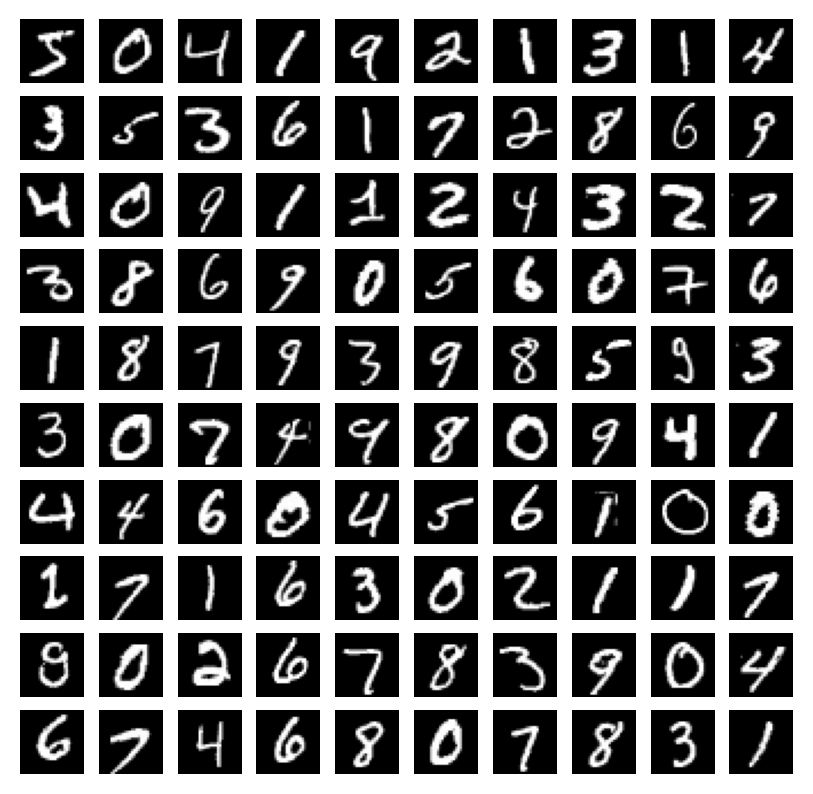

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5), dpi=200)
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i,:], cmap='gray')
  plt.axis('off')
plt.show()

**Paramètres**

In [4]:
# image dimensions (assumed square)
input_size = x_train.shape[1] * x_train.shape[2]
input_size

784

In [5]:
# compute the number of labels
num_classes = len(np.unique(y_train))
num_classes

10

**Préparation des données**

In [6]:
# convert y to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# resize and normalize x
# converting a 2D array (28x28) into a 1D array (784) for feeding into the MLP
#x_train = np.reshape(x_train, [-1, input_size])
x_train = np.reshape(x_train, [x_train.shape[0], input_size])
x_train = x_train.astype('float32') / 255
#x_test = np.reshape(x_test, [-1, input_size])
x_test = np.reshape(x_test, [x_test.shape[0], input_size])
x_test = x_test.astype('float32') / 255
print("x_train type:", type(x_train))
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train type: <class 'numpy.ndarray'>

x_train shape: (60000, 784)

x_test shape: (10000, 784)

y_train shape: (60000, 10)

y_test shape: (10000, 10)


**Modèles MLP**

In [7]:
# 1-layer MLP with ReLU and dropout after each layer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 256)               200960    

                                                                 

 activation (Activation)     (None, 256)               0         

                                                                 

 dropout (Dropout)           (None, 256)               0         

                                                                 

 dense_1 (Dense)             (None, 10)                2570      

                                                                 

 activation_1 (Activation)   (None, 10)                0         

                                                                 


Total params: 203,530

Trainable params: 203,530

Non-trainable params: 0

_________________________________________________________________


In [38]:
# 2-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_9 (Dense)              (None, 256)               200960    

_________________________________________________________________

activation_9 (Activation)    (None, 256)               0         

_________________________________________________________________

dense_10 (Dense)             (None, 128)               32896     

_________________________________________________________________

activation_10 (Activation)   (None, 128)               0         

_________________________________________________________________

dense_11 (Dense)             (None, 10)                1290      

_________________________________________________________________

activation_11 (Activation)   (None, 10)                0         


Total params: 235,146

Trainable params: 235,146

Non-trainable params: 0

_____________________________

In [ ]:
# 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

In [23]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.5
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_8 (Dense)              (None, 256)               200960    

_________________________________________________________________

activation_8 (Activation)    (None, 256)               0         

_________________________________________________________________

dropout_6 (Dropout)          (None, 256)               0         

_________________________________________________________________

dense_9 (Dense)              (None, 256)               65792     

_________________________________________________________________

activation_9 (Activation)    (None, 256)               0         

_________________________________________________________________

dropout_7 (Dropout)          (None, 256)               0         

_________________________________________________________________

dense_10 (Dense)             (None, 10

**Compilation du modèle**

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Apprentissage du modèle**

In [9]:
batch_size = 128
start_time = time.time()
model.fit(x_train, y_train, epochs=30, batch_size=batch_size)
print("Temps de calcul :", time.time() - start_time)

Epoch 1/30

469/469 [==============================] - 9s 4ms/step - loss: 0.4100 - accuracy: 0.8770

Epoch 2/30

469/469 [==============================] - 2s 4ms/step - loss: 0.2023 - accuracy: 0.9407

Epoch 3/30

469/469 [==============================] - 2s 3ms/step - loss: 0.1557 - accuracy: 0.9545

Epoch 4/30

469/469 [==============================] - 2s 3ms/step - loss: 0.1352 - accuracy: 0.9597

Epoch 5/30

469/469 [==============================] - 2s 4ms/step - loss: 0.1173 - accuracy: 0.9643

Epoch 6/30

469/469 [==============================] - 2s 3ms/step - loss: 0.1028 - accuracy: 0.9679

Epoch 7/30

469/469 [==============================] - 2s 3ms/step - loss: 0.0936 - accuracy: 0.9714

Epoch 8/30

469/469 [==============================] - 2s 3ms/step - loss: 0.0869 - accuracy: 0.9735

Epoch 9/30

469/469 [==============================] - 2s 3ms/step - loss: 0.0797 - accuracy: 0.9750

Epoch 10/30

469/469 [==============================] - 2s 4ms/step - loss: 0.0770

**Performances**

In [6]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 0.025504251942038536
Test accuracy: 99.33%
Error rate: 0.67%


## Modèles CNN

**Données pour CNN**

In [3]:
# Load the data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (x_train.shape[1],x_train.shape[2],1)
num_classes = len(np.unique(y_train))
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
# données transformées en tenseurs d’ordre 4
# à noter que la commande qui suit est inutile pour cifar10
# qui est chargé par cifar10.load_data() comme tenseur d'ordre 4
# alors que mnist.load_data() charge un tenseur d'ordre 3
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

60000 train samples
10000 test samples
x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


**Modèles CNN**

In [6]:
# exemple https://keras.io/examples/vision/mnist_convnet/
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

2022-12-05 12:26:28.057471: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
# exemple cours sans couche dense intermédiaire
# https://keras.io/api/layers/
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(20, kernel_size=(5,5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        layers.Conv2D(60, kernel_size=(5,5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5, seed=235),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 60)          30060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 60)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dropout (Dropout)           (None, 540)               0

In [12]:
# exemple cours
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(20, kernel_size=(5,5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        layers.Conv2D(60, kernel_size=(5,5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5, seed=235),
        layers.Dense(300, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 24, 24, 20)        520       

                                                                 

 max_pooling2d (MaxPooling2D  (None, 11, 11, 20)       0         

 )                                                               

                                                                 

 conv2d_1 (Conv2D)           (None, 7, 7, 60)          30060     

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 3, 3, 60)         0         

 2D)                                                             

                                                                 

 flatten (Flatten)           (None, 540)               0         

                                                                 

 dropout_1 (Dropout)         (None, 54

**Apprentissage du modèle**

In [5]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
#callbacks = [ keras.callbacks.TensorBoard(log_dir='./logs') ]
start_time = time.time()
#model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.1)
#history=model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=10, callbacks=callbacks)
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=30)
#model.fit(x_train, y_train, batch_size=128, epochs=30)
print("Temps de calcul :", time.time() - start_time)

Epoch 1/30
469/469 [==============================] - 28s 12ms/step - loss: 0.3622 - accuracy: 0.8882 - val_loss: 0.0752 - val_accuracy: 0.9774
Epoch 2/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0970 - accuracy: 0.9700 - val_loss: 0.0428 - val_accuracy: 0.9866
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0694 - accuracy: 0.9788 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0275 - val_accuracy: 0.9911
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0254 - val_accuracy: 0.9922
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0255 - val_accuracy: 0.9921


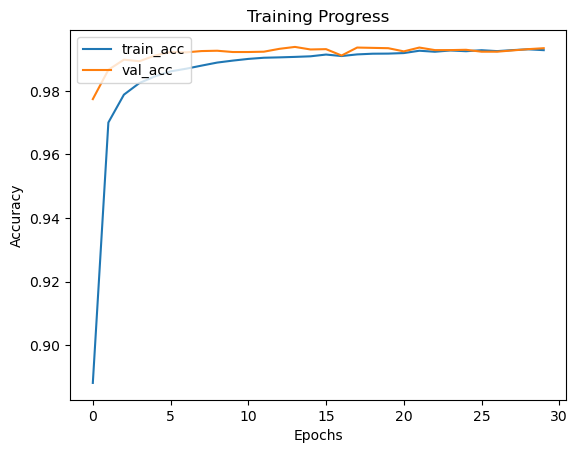

In [6]:
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
plot_hist(history)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs
# aller à http://localhost:6006/

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

**Evaluation**

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 0.02726
Test accuracy: 99.34%
Error rate: 0.66%


In [8]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions[:2]

313/313 [==============================] - 1s 2ms/step
(10000, 10)


array([[5.0339883e-09, 8.2894513e-10, 1.2696123e-06, 3.8093453e-09,
        8.1074280e-13, 4.2019509e-12, 1.8119510e-16, 9.9999857e-01,
        5.7689142e-11, 1.0794926e-07],
       [1.2516491e-06, 2.4054142e-08, 9.9999869e-01, 9.2188366e-12,
        6.9444498e-12, 2.6249914e-14, 4.1593552e-08, 2.0957575e-14,
        1.2476691e-09, 3.0111955e-12]], dtype=float32)

In [9]:
import pandas as pd
pd.crosstab(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1), margins=True, margins_name='Total')

col_0,0,1,2,3,4,5,6,7,8,9,Total
row_0,,,,,,,,,,,
0,974,0,0,1,0,0,2,1,1,1,980
1,0,1130,1,3,0,0,1,0,0,0,1135
2,0,0,1032,0,0,0,0,0,0,0,1032
3,0,0,0,1007,0,0,0,1,1,1,1010
4,0,0,0,0,979,0,1,0,0,2,982
5,0,0,0,3,0,887,1,1,0,0,892
6,3,2,1,0,1,2,948,0,1,0,958
7,0,3,8,1,0,1,0,1013,0,2,1028
8,0,0,3,0,0,1,0,1,967,2,974


## Sauvegarde du modèle CNN

In [10]:
# https://www.tensorflow.org/guide/keras/save_and_serialize?hl=en
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
# The model architecture, and training configuration (including the optimizer, losses, and metrics) are stored in saved_model.pb
#The weights are saved in the variables/ directory.
model.save("modelMNIST_nonpruned")

INFO:tensorflow:Assets written to: modelMNIST_nonpruned\assets


INFO:tensorflow:Assets written to: modelMNIST_nonpruned\assets


In [11]:
# Lecture du modèle
#reconstructed_model = keras.models.load_model("modelMNIST")
MNIST_model = keras.models.load_model("modelMNIST_nonpruned")
# Comparaison des prédictions des deux modèles
np.testing.assert_allclose(model.predict(x_test), MNIST_model.predict(x_test))

313/313 [==============================] - 1s 2ms/step


## Application du modèle CNN

(28, 28, 1)
(1, 28, 28, 1)


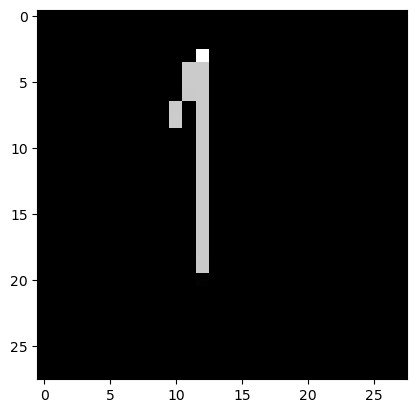

In [13]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img_width, img_height = 28, 28
img = image.load_img('D:/Data/chiffres/chiffre1.jpg', color_mode="grayscale", target_size = (img_width, img_height))
img = image.img_to_array(img)/255
print(img.shape)
img = np.expand_dims(1-img, axis = 0)
print(img.shape)
#import matplotlib.pyplot as plt
plt.imshow(img[0,:], cmap='gray')

In [14]:
predictions = MNIST_model.predict(img)
print(predictions)
np.argmax(predictions, axis=1)

1/1 [==============================] - 1s 539ms/step
[[3.5880685e-03 9.8235625e-01 1.3392004e-03 6.9748625e-05 1.7353736e-03
  5.5792113e-03 3.1221537e-03 1.6682019e-03 3.3869605e-05 5.0809421e-04]]


array([1], dtype=int64)

## Elagage de modèles CNN

In [ ]:
# L'élagage consiste à mettre à 0 les poids contribuant le moins à la performance du modèle
# https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras
# https://www.tensorflow.org/model_optimization/guide/pruning/comprehensive_guide.md
# https://www.dlology.com/blog/how-to-compress-your-keras-model-x5-smaller-with-tensorflow-model-optimization/

In [16]:
#pip install -q tensorflow-model-optimization

Note: you may need to restart the kernel to use updated packages.


**Elage du modèle entier**

In [32]:
#import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity

# nombre d'itérations pour 4 passages (suffisants puisque le modèle est déjà bien ajusté)
batch_size = 128
epochs = 4
num_images = x_train.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# paramètres d'élagage
# we start the model with 50% sparsity (50% zeros in weights) and end with 90% sparsity
# on commence l'élagage immédiatement dès le début de l'apprentissage (begin_step=0)
# la fréquence = x quand on élague le modèle tous les x itérations (taille progressive
# pour que l'apprentissage puisse "repartir" entre deux tailles)
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=1)
}

model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)
model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 24, 24, 20)       1022      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 11, 11, 20)       1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv2d_  (None, 7, 7, 60)         60062     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 3, 3, 60)         1         
 ling2d_1 (PruneLowMagnitude                                     
 )                                                               
                                                        

In [33]:
# `prune_low_magnitude` requires a recompile.
#model_for_pruning.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model_for_pruning.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# un callback est nécessaire pour relier l'étape d'élagage à celle d'optimisation
callbacks = [sparsity.UpdatePruningStep()]
model_for_pruning.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks)

In [34]:
# un callback est nécessaire pour relier l'étape d'élagage à celle d'optimisation
# si plantage sur GPU => passer sur CPU comme suit (https://github.com/tensorflow/model-optimization/issues/1026) :
with tf.device('/cpu:0'):
    callbacks = [sparsity.UpdatePruningStep()]
    model_for_pruning.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks)

Epoch 1/4
469/469 [==============================] - 21s 40ms/step - loss: 0.1097 - accuracy: 0.9669
Epoch 2/4
469/469 [==============================] - 20s 44ms/step - loss: 0.0783 - accuracy: 0.9761
Epoch 3/4
469/469 [==============================] - 21s 45ms/step - loss: 0.0941 - accuracy: 0.9716
Epoch 4/4
469/469 [==============================] - 21s 45ms/step - loss: 0.1190 - accuracy: 0.9631


In [35]:
loss, acc = model_for_pruning.evaluate(x_test, y_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 0.05042
Test accuracy: 98.40%
Error rate: 1.60%


In [36]:
# on enregistre le modèle élagué mais on constate qu'il est au moins aussi lourd que le modèle non élagué
# c'est parce qu'il a autant de poids que le modèle non élagué
# ce qui le distingue est que de nombreux poids ont été mis à 0
# ce qui permet de compresser (par zip) le modèle élagué plus fortement que le modèle initial
#model_for_pruning.save("modelMNIST_pruned")
model_for_pruning.save("modelMNIST_pruned", include_optimizer=False)

INFO:tensorflow:Assets written to: modelMNIST_pruned\assets


INFO:tensorflow:Assets written to: modelMNIST_pruned\assets


In [37]:
# Lecture du modèle
MNIST_model = keras.models.load_model("modelMNIST_pruned")
loss, acc = MNIST_model.evaluate(x_test, y_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 0.05042
Test accuracy: 98.40%
Error rate: 1.60%


**Suppression des wrappers d'élagage**

In [38]:
# la fonction strip_pruning sert à ôter des tenseurs créés pour l'apprentissage du modèle
# mais inutiles à son application et dont la suppression allège le modèle
final_model = sparsity.strip_pruning(model_for_pruning)
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 60)          30060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 60)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dropout (Dropout)           (None, 540)               0

**Taux d'élagage**

In [30]:
# calcul du taux d'élagage par couche du réseau
import numpy as np

for i, w in enumerate(final_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            final_model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

conv2d/kernel:0 -- Total:500, Zeros: 90.00%
conv2d/bias:0 -- Total:20, Zeros: 0.00%
conv2d_1/kernel:0 -- Total:30000, Zeros: 90.00%
conv2d_1/bias:0 -- Total:60, Zeros: 0.00%
dense/kernel:0 -- Total:5400, Zeros: 90.00%
dense/bias:0 -- Total:10, Zeros: 0.00%


**Elagage partiel**

In [31]:
# Helper function uses `prune_low_magnitude` to make only the Dense layers train with pruning
def apply_pruning_to_dense(layer):
  if isinstance(layer, tf.keras.layers.Dense):
    return sparsity.prune_low_magnitude(layer)
  return layer

# Use `tf.keras.models.clone_model` to apply `apply_pruning_to_dense` to the layers of the model
model_for_pruning = tf.keras.models.clone_model(model, clone_function=apply_pruning_to_dense)
model_for_pruning.summary()

# on peut ensuite compiler et entraîner le modèle (partiellement) élagué comme plus haut

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 60)          30060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 60)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dropout (Dropout)           (None, 540)               0

## Liste des objets de la session

In [43]:
%whos

Variable                 Type          Data/Info
------------------------------------------------
MNIST_model              Sequential    <keras.engine.sequential.<...>object at 0x7f546a0af750>
acc                      float         0.989799976348877
apply_pruning_to_dense   function      <function apply_pruning_t<...>_dense at 0x7f50d617b950>
batch_size               int           128
callbacks                list          n=1
end_step                 int64         4690
epochs                   int           10
final_model              Sequential    <keras.engine.sequential.<...>object at 0x7f50d48a1d90>
history                  History       <keras.callbacks.History <...>object at 0x7f556c523050>
i                        int           5
image                    module        <module 'keras.preprocess<...>/preprocessing/image.py'>
input_shape              tuple         n=3
keras                    LazyLoader    <module 'keras.api._v2.ke<...>i/_v2/keras/__init__.py'>
layers             